# **EDA Cleaning and Rainfall Predictions on Australia Rainfall Dataset with Different Classification Machine Learning Algorithms**

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb

# Reading and Importing Data

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.describe

<bound method NDFrame.describe of              Date       Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0      2008-12-01         Albury     13.4  ...     21.8         No            No
1      2008-12-02         Albury      7.4  ...     24.3         No            No
2      2008-12-03         Albury     12.9  ...     23.2         No            No
3      2008-12-04         Albury      9.2  ...     26.5         No            No
4      2008-12-05         Albury     17.5  ...     29.7         No            No
...           ...            ...      ...  ...      ...        ...           ...
21895  2011-02-16  NorfolkIsland     21.9  ...     25.6         No            No
21896  2011-02-17  NorfolkIsland     22.0  ...     25.0         No           Yes
21897  2011-02-18  NorfolkIsland     22.9  ...     27.0        Yes           Yes
21898  2011-02-19  NorfolkIsland     22.2  ...     25.2        Yes            No
21899  2011-02-20  NorfolkIsland     20.0  ...      NaN        NaN         

In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10811 non-null  object 
 1   Location       10811 non-null  object 
 2   MinTemp        10757 non-null  float64
 3   MaxTemp        10766 non-null  float64
 4   Rainfall       10676 non-null  float64
 5   Evaporation    4357 non-null   float64
 6   Sunshine       2005 non-null   float64
 7   WindGustDir    10624 non-null  object 
 8   WindGustSpeed  10624 non-null  float64
 9   WindDir9am     9786 non-null   object 
 10  WindDir3pm     10657 non-null  object 
 11  WindSpeed9am   10730 non-null  float64
 12  WindSpeed3pm   10734 non-null  float64
 13  Humidity9am    10616 non-null  float64
 14  Humidity3pm    10610 non-null  float64
 15  Pressure9am    10599 non-null  float64
 16  Pressure3pm    10595 non-null  float64
 17  Cloud9am       5655 non-null   float64
 18  Cloud3

# Visualising Null Values

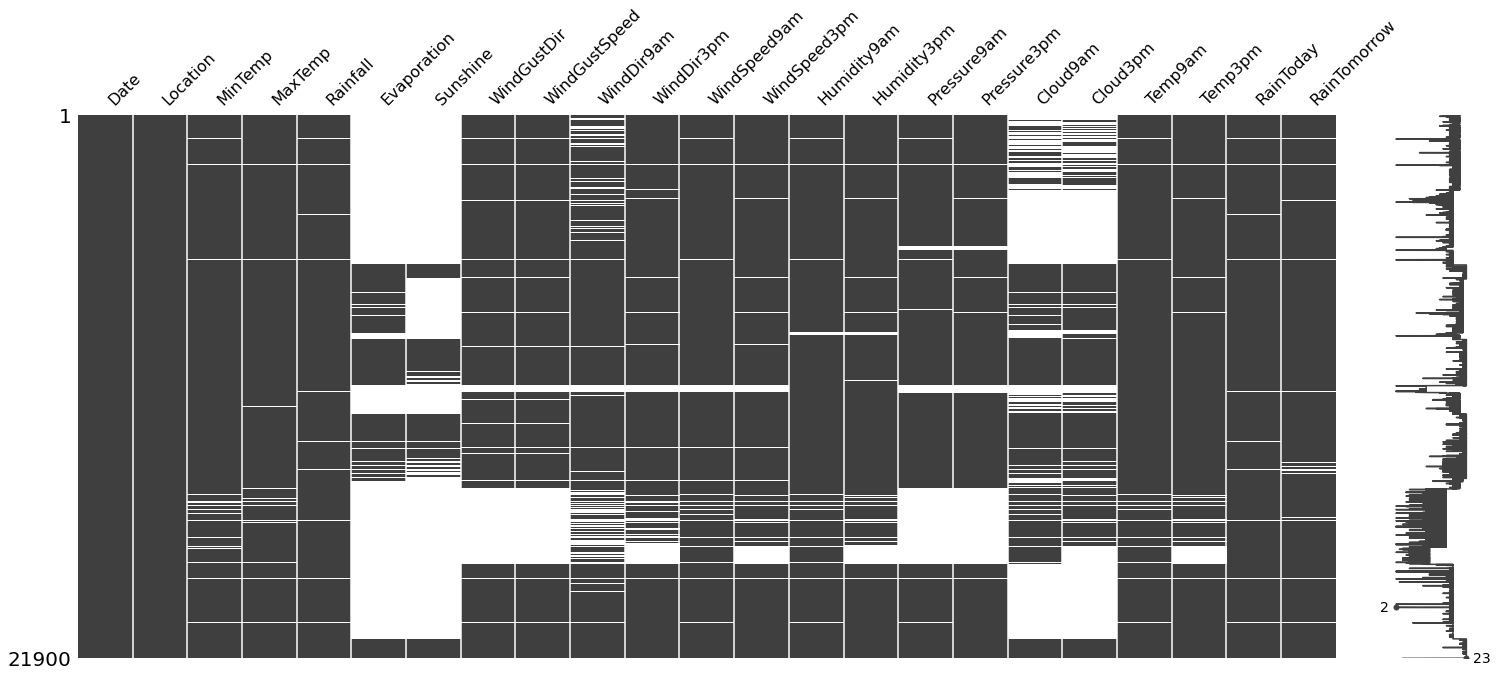

In [4]:
import missingno as ms
ms.matrix(df)

# Removing columns having more null values

In [5]:
clean = df.drop(axis = 1, columns = ["Evaporation", "Sunshine","Cloud9am","Cloud3pm"])

# Converting date into day, month and year seperately because month alone plays significant role in rain prediction as different months has different rainfall patterns 

In [6]:
clean['Date'] = pd.to_datetime(arg=clean['Date'])

In [7]:
clean["Month"] = clean["Date"].dt.month
clean["Year"] = clean["Date"].dt.year
clean["Day"] = clean["Date"].dt.day

# Removing null rows

In [8]:
mod_data = clean.dropna(how='any',axis=0)

# Visualising the correlations within Table

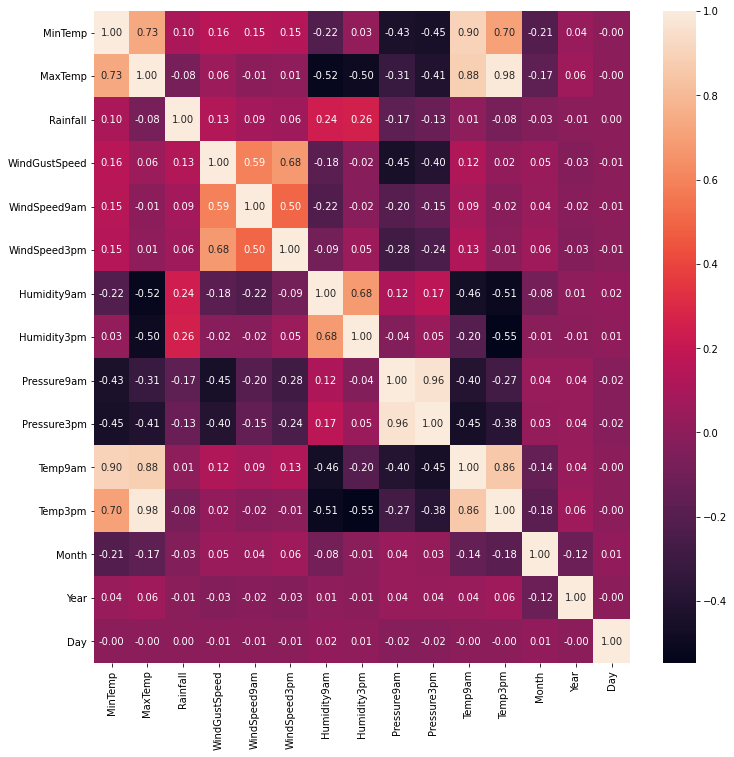

In [ ]:
fig, ax = mp.subplots(figsize=[12,12])
sb.heatmap(mod_data.corr(),fmt=".2f",annot=True)

It seems like from the above fig the Max Temp is highly correlated with Temp at 3pm.

Similar correlation observed for Temp at 9am and MinTemp

Pressure and temp are negatively correlated

Humidity and temp are Negatively correlated

In [ ]:
mod_data.describe

<bound method NDFrame.describe of              Date Location  MinTemp  MaxTemp  ...  RainTomorrow Month  Year Day
0      2008-12-01   Albury     13.4     22.9  ...            No    12  2008   1
1      2008-12-02   Albury      7.4     25.1  ...            No    12  2008   2
2      2008-12-03   Albury     12.9     25.7  ...            No    12  2008   3
3      2008-12-04   Albury      9.2     28.0  ...            No    12  2008   4
4      2008-12-05   Albury     17.5     32.3  ...            No    12  2008   5
...           ...      ...      ...      ...  ...           ...   ...   ...  ..
145454 2017-06-20    Uluru      3.5     21.8  ...            No     6  2017  20
145455 2017-06-21    Uluru      2.8     23.4  ...            No     6  2017  21
145456 2017-06-22    Uluru      3.6     25.3  ...            No     6  2017  22
145457 2017-06-23    Uluru      5.4     26.9  ...            No     6  2017  23
145458 2017-06-24    Uluru      7.8     27.0  ...            No     6  2017  24

[1129

# An Intuitive visualization on the relations of Rainy days and Humidity/Pressure

Text(0, 0.5, 'Pressure at 3pm')

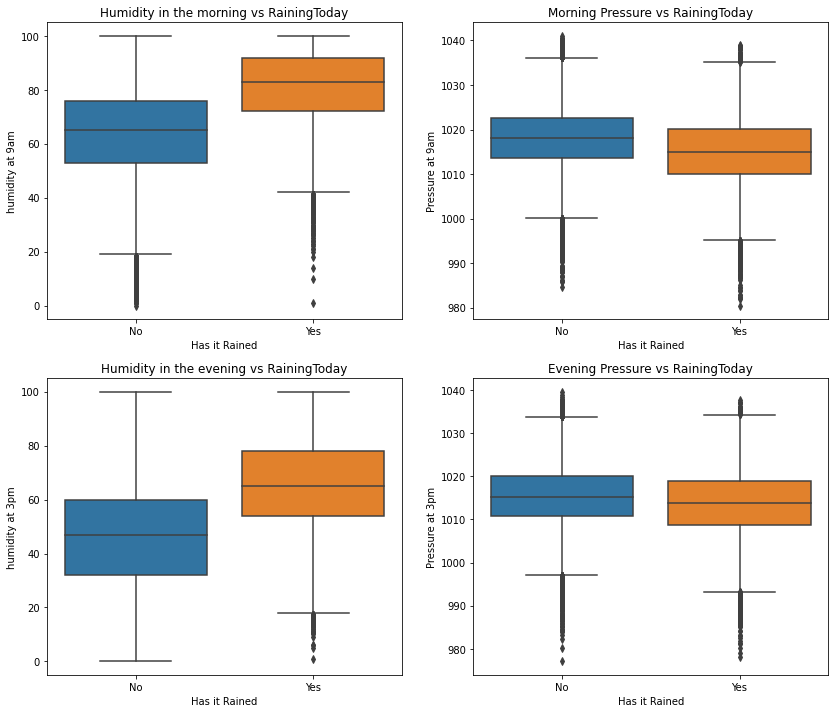

In [ ]:
mp.figure(1,figsize=[14,12])

#Subplot 1
mp.subplot(2,2,1)
sb.boxplot(data=mod_data,y="Humidity9am",x="RainToday")
mp.title("Humidity in the morning vs RainingToday")
mp.xlabel("Has it Rained")
mp.ylabel("humidity at 9am")

#Subplot 2
mp.subplot(2,2,2)
sb.boxplot(data=mod_data,y="Pressure9am",x="RainToday")
mp.title("Morning Pressure vs RainingToday")
mp.xlabel("Has it Rained")
mp.ylabel("Pressure at 9am")

#Subplot 3
mp.subplot(2,2,3)
sb.boxplot(data=mod_data,y="Humidity3pm",x="RainToday")
mp.title("Humidity in the evening vs RainingToday")
mp.xlabel("Has it Rained")
mp.ylabel("humidity at 3pm")

#Subplot 4
mp.subplot(2,2,4)
sb.boxplot(data=mod_data,y="Pressure3pm",x="RainToday")
mp.title("Evening Pressure vs RainingToday")
mp.xlabel("Has it Rained")
mp.ylabel("Pressure at 3pm")

# Raining Locations today

Text(0, 0.5, 'Humidity Today')

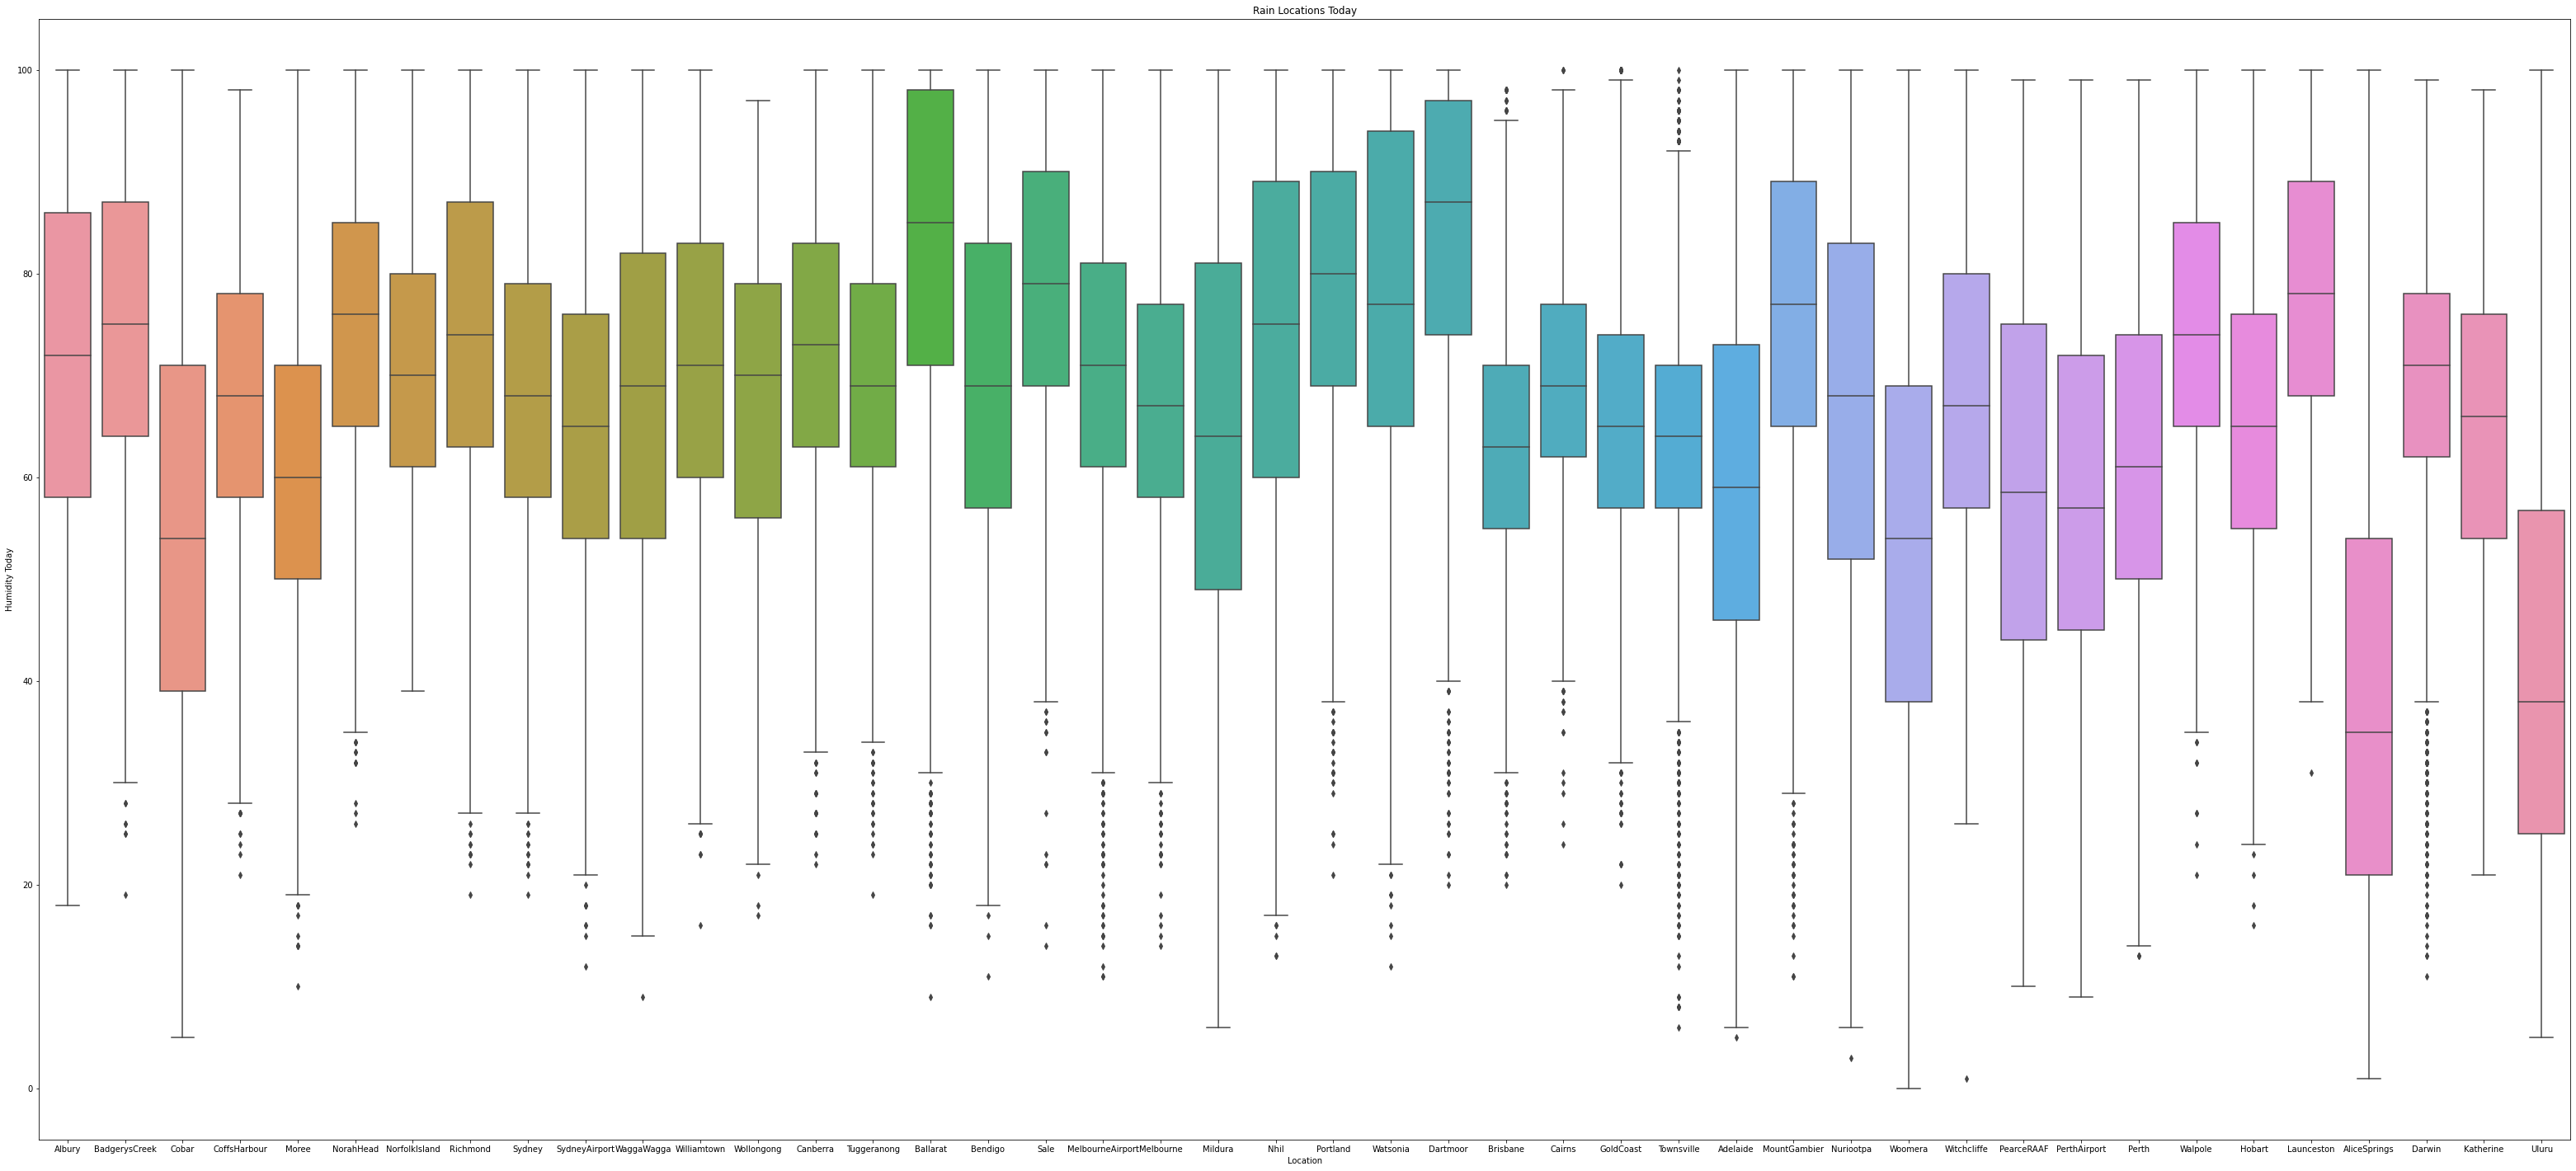

In [ ]:
mp.figure(figsize=(55,25))
sb.boxplot(data=mod_data,y="Humidity9am",x="Location")
mp.title("Rain Locations Today")
mp.xlabel("Location")
mp.ylabel("Humidity Today")

# Analysing if its gonna rain tomorrow or not using graphs 

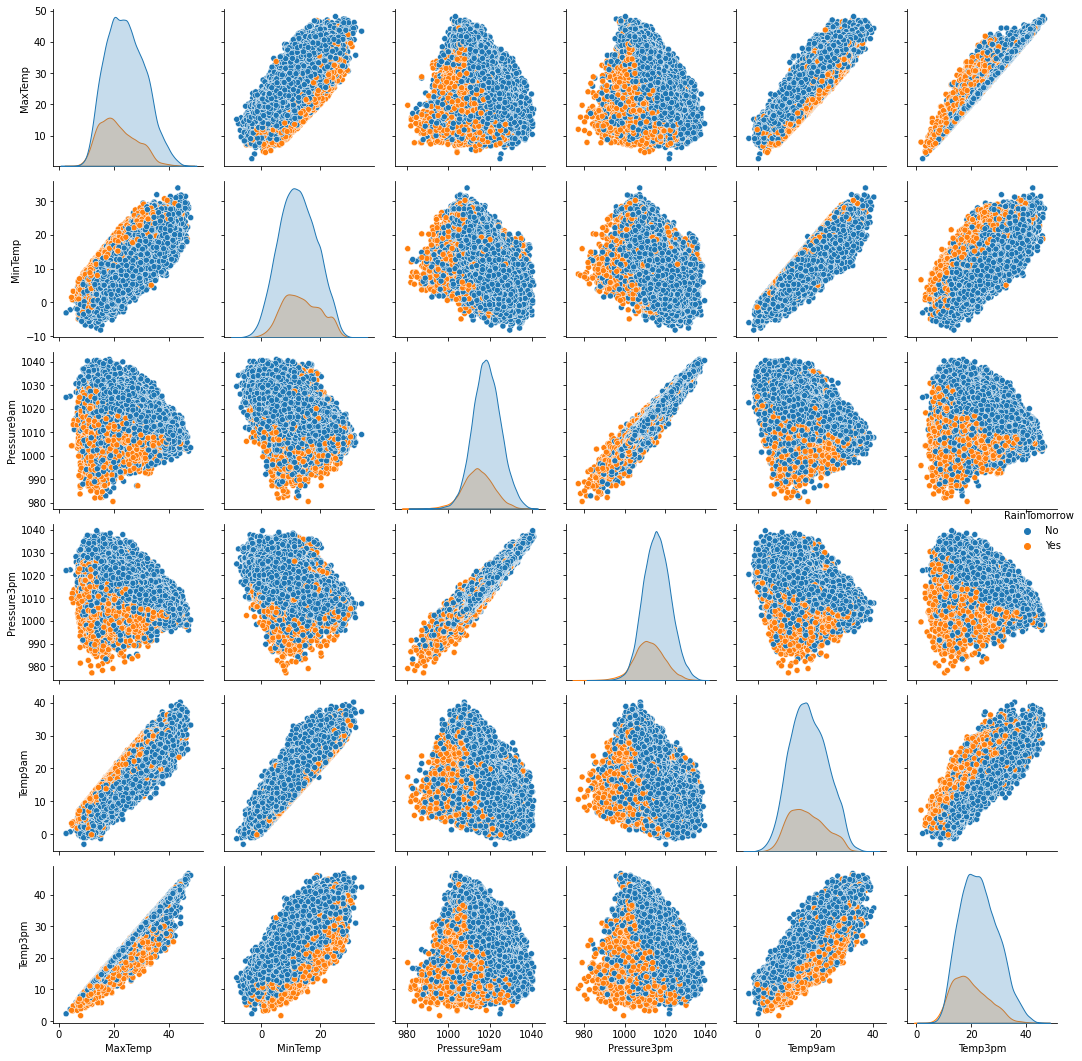

In [ ]:
sb.pairplot( data=mod_data, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm'), hue='RainTomorrow' )

# Monthwise comparision of Temparature/Humidity

Text(0, 0.5, 'Evening Humidity')

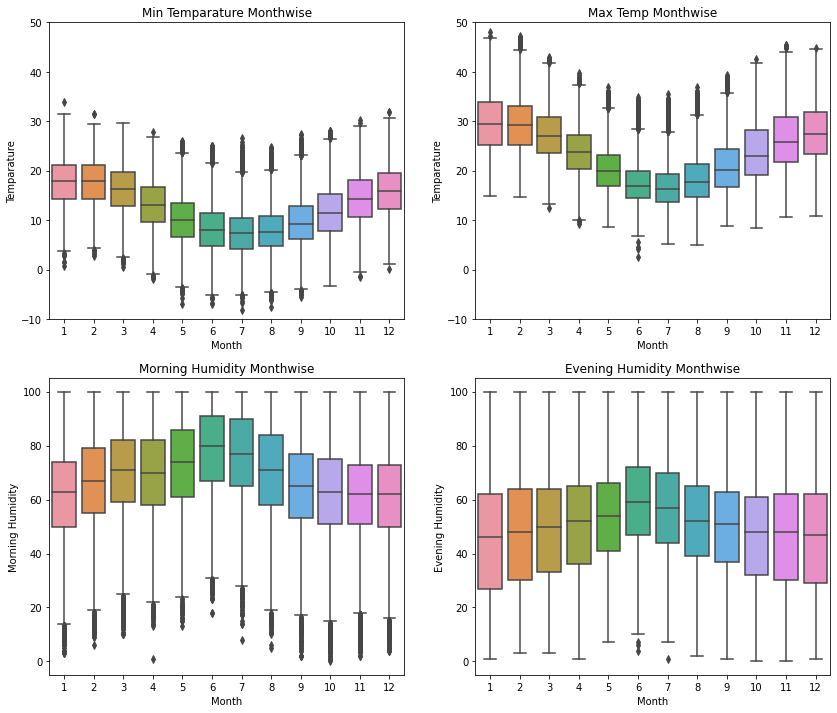

In [ ]:
#Multiplotting
mp.figure(1,figsize=[14,12])

#Subplot 1
mp.subplot(2,2,1)
sb.boxplot(data=mod_data,y="MinTemp",x="Month")
mp.title("Min Temparature Monthwise")
mp.xlabel("Month")
mp.ylabel("Temparature")
mp.ylim([-10,50])

#Subplot 2
mp.subplot(2,2,2)
sb.boxplot(data=mod_data,y="MaxTemp",x="Month")
mp.title("Max Temp Monthwise")
mp.xlabel("Month")
mp.ylabel("Temparature")
mp.ylim([-10,50])

#Subplot 3
mp.subplot(2,2,3)
sb.boxplot(data=mod_data,y="Humidity9am",x="Month")
mp.title("Morning Humidity Monthwise")
mp.xlabel("Month")
mp.ylabel("Morning Humidity")

#Subplot 4
mp.subplot(2,2,4)
sb.boxplot(data=mod_data,y="Humidity3pm",x="Month")
mp.title("Evening Humidity Monthwise")
mp.xlabel("Month")
mp.ylabel("Evening Humidity")

# Mappping the Yes and No Classifications as 0 and 1 for machine learning algo to understand

In [9]:
mod_data["RainToday"] = mod_data["RainToday"].map({"No":0,"Yes":1})
mod_data["RainTomorrow"] = mod_data["RainTomorrow"].map({"No":0,"Yes":1})
mod_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,2008,1
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12,2008,2
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12,2008,3
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12,2008,4
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12,2008,5


# Replacing the directions and Locations as unpivoted columns with 0 and 1 values for machine learning algo to understand

In [10]:
WindGustDir_dummies = pd.get_dummies(mod_data["WindGustDir"],drop_first=True,prefix="WindGustDir")
WindDir9am_dummies = pd.get_dummies(mod_data["WindDir9am"],drop_first=True,prefix="WindDir9am")
WindDir3pm_dummies = pd.get_dummies(mod_data["WindDir3pm"],drop_first=True,prefix="WindDir3pm")
Location_dummies = pd.get_dummies(mod_data["Location"],drop_first=True,prefix="Country")
mod_data2=pd.concat([mod_data,Location_dummies, WindDir3pm_dummies,WindDir9am_dummies,WindGustDir_dummies],axis=1)
mod_data2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day,Country_BadgerysCreek,Country_Cobar,Country_CoffsHarbour,Country_Moree,Country_NorahHead,Country_NorfolkIsland,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12,2008,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12,2008,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12,2008,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12,2008,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Dropping the unwanted columns like Date(As we already separated this into day, month and Year), Location, WindGustDir, WindDir9am and WindDir3pm

In [11]:
mod_data2.drop(["Location","Date", "WindGustDir","WindDir9am","WindDir3pm"],inplace=True,axis=1)

### Rearranging the columns for convenience

In [12]:
cols = list(mod_data2.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('RainTomorrow')) #Remove b from list
mod_data2 = mod_data2[cols+["RainTomorrow"]]
mod_data2.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Month,Year,Day,Country_BadgerysCreek,Country_Cobar,Country_CoffsHarbour,Country_Moree,Country_NorahHead,Country_NorfolkIsland,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,12,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,12,2008,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,12,2008,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,12,2008,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,12,2008,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Splitting the Dataset into training set and test set

In [13]:
X = mod_data2.iloc[:, :-1].values
y = mod_data2.loc[:,"RainTomorrow"].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Scaling down the datas into a smaller range

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying Decision Tree Classification

Decision Tree: Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

## Important Terminology related to Decision Trees
 
Root Node: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.

Splitting: It is a process of dividing a node into two or more sub-nodes.

Decision Node: When a sub-node splits into further sub-nodes, then it is called the decision node.

Leaf / Terminal Node: Nodes do not split is called Leaf or Terminal node.
Pruning: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.

Branch / Sub-Tree: A subsection of the entire tree is called branch or sub-tree.
Parent and Child Node: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1633  189]
 [ 237  248]]


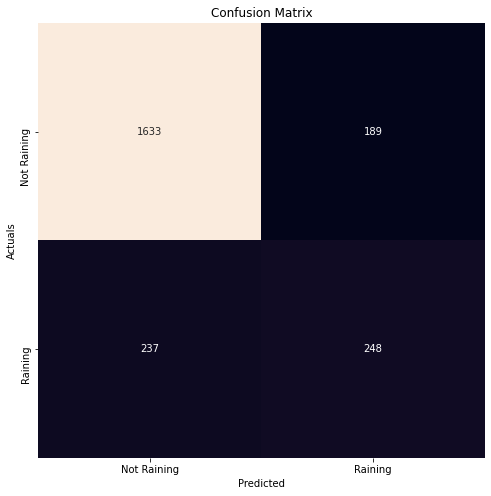

In [ ]:
mp.figure(figsize = (8,8))
sb.heatmap(cm,fmt="d",annot=True,xticklabels=["Not Raining","Raining"],yticklabels=["Not Raining","Raining"],cbar=False)
mp.title("Confusion Matrix")
mp.xlabel("Predicted")
mp.ylabel("Actuals")
mp.show()

### We got the accuracy score of 81.53%

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8153446033810143

## Applying Random Forest Classification
Random Forest: Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity (it can be used for both classification and regression tasks).

The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21055   984]
 [ 3310  2883]]


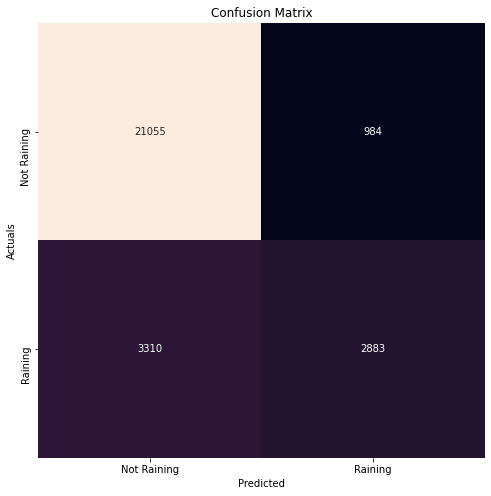

In [ ]:
mp.figure(figsize = (8,8))
sb.heatmap(cm,fmt="d",annot=True,xticklabels=["Not Raining","Raining"],yticklabels=["Not Raining","Raining"],cbar=False)
mp.title("Confusion Matrix")
mp.xlabel("Predicted")
mp.ylabel("Actuals")
mp.show()

### We got an accuracy of 84.79%

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8479030886936809

## Applying K Nearest Neighbours Classification
KNN Classification: It is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data).

We are given some prior data (also called training data), which classifies coordinates into groups identified by an attribute.

### Algorithm
Let m be the number of training data samples. Let p be an unknown point.

Store the training samples in an array of data points arr[]. This means each element of this array represents a tuple (x, y).

for i=0 to m:
  Calculate Euclidean distance d(arr[i], p).

Make set S of K smallest distances obtained. Each of these distances corresponds to an already classified data point.
Return the majority label among S.

K can be kept as an odd number so that we can calculate a clear majority in the case where only two groups are possible (e.g. Red/Blue). With increasing K, we get smoother, more defined boundaries across different classifications. Also, the accuracy of the above classifier increases as we increase the number of data points in the training set

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3056  157]
 [ 650  209]]


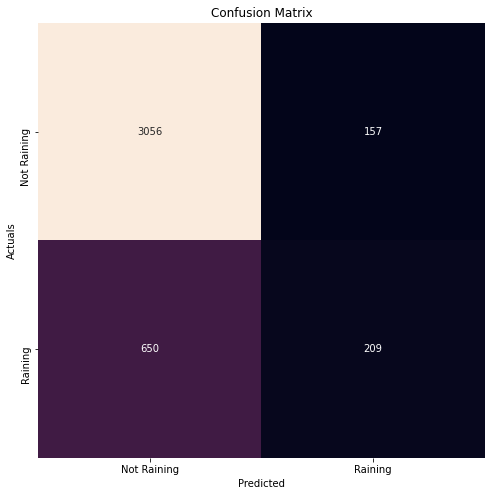

In [19]:
mp.figure(figsize = (8,8))
sb.heatmap(cm,fmt="d",annot=True,xticklabels=["Not Raining","Raining"],yticklabels=["Not Raining","Raining"],cbar=False)
mp.title("Confusion Matrix")
mp.xlabel("Predicted")
mp.ylabel("Actuals")
mp.show()

### We got 80.18% accuracy 

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8018172888015717

So we got to know that highest accuracy is of Random Forest Algorithm with 84.79% as it uses the combination of diffrent Decision Tree Classification Algorithm 